In [0]:
import numpy as np
import matplotlib as plt
from matplotlib import pyplot
%matplotlib inline
from keras.models import Model, Sequential
from keras.layers import Input, Dense, BatchNormalization, Dropout, LeakyReLU
from keras.optimizers import Adam

In [0]:
def function(x):
    return x*x # (x*x-13) + (5+x**3)

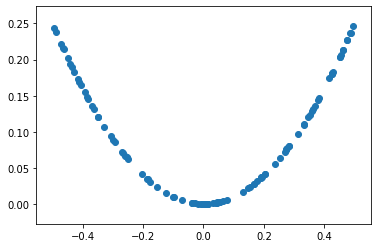

In [225]:
def generate_real_samples(n=100):
	X1 = np.random.rand(n) - 0.5
	X2 = function(X1)
	X1 = X1.reshape(n, 1)
	X2 = X2.reshape(n, 1)
	return np.hstack((X1, X2))

data = generate_real_samples()
pyplot.scatter(data[:, 0], data[:, 1])
pyplot.show()

In [0]:
def generate_fake_samples(n):
    X1 = np.random.rand(n) - 0.5
    X2 = np.random.rand(n) - 0.5
    X1 = X1.reshape(n, 1)
    X2 = X2.reshape(n, 1)
    return np.hstack((X1, X2))

In [0]:
def define_discriminator(n_inputs=2):
    model = Sequential()
    model.add(Dense(32, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [0]:
def train_discriminator(discriminator, epochs=1000, batch_size=128):
    half_batch_size = int(batch_size/2)
    for i in range(1, epochs+1):
        x_real = generate_real_samples(half_batch_size)
        y_real = np.ones((half_batch_size, 1))
        discriminator.train_on_batch(x_real, y_real)

        x_fake = generate_fake_samples(half_batch_size)
        y_fake = np.zeros((half_batch_size, 1))
        discriminator.train_on_batch(x_fake, y_fake)
        
        _, acc_real = discriminator.evaluate(x_real, y_real, verbose=0)
        _, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose=0)

        if i%100==0: print(f'{i}: R_{acc_real}, F_{acc_fake}')
    

In [213]:
discriminator = define_discriminator()
train_discriminator(discriminator)

100: R_1.0, F_0.421875
200: R_1.0, F_0.546875
300: R_1.0, F_0.71875
400: R_1.0, F_0.71875
500: R_1.0, F_0.796875
600: R_1.0, F_0.84375
700: R_1.0, F_0.84375
800: R_1.0, F_0.84375
900: R_1.0, F_0.890625
1000: R_1.0, F_0.921875


In [0]:
def define_generator(input_dim, n_outputs=2):
    model = Sequential()
    model.add(Dense(15, activation='relu', input_dim=input_dim))
    model.add(Dense(n_outputs, activation='linear'))
    return model

In [0]:
def generate_fake_samples(generator, latent_dim, n, plot=False):
    x_input = np.random.randn(latent_dim*n).reshape(n, latent_dim)
    X = generator.predict(x_input)
    if plot:
        pyplot.scatter(X[:,0], X[:,1])
        pyplot.show()
    return X

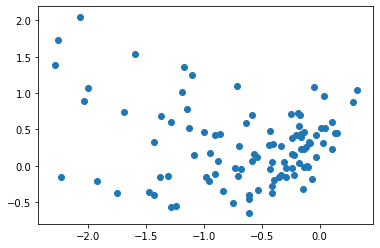

In [219]:
generator = define_generator(5)
X = generate_new_samples(generator, 5, 100, plot=True)

In [0]:
def define_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

In [0]:
def train_gan(gan, latent_dim, epochs=2000, batch_size=128):
    for i in range(epochs):
        x = np.random.randn(latent_dim*batch_size).reshape(batch_size, latent_dim)
        y = ones((batch_size, 1))
        gan.train_on_batch(x, y)

In [0]:
def summary(epoch, generator, discriminator, latent_dim, n=100):
    x_real = generate_real_samples(n)
    y_real = ones((n, 1))
    _, acc_real = discriminator.evaluate(x_real, y_real, verbose=0)

    x_fake = generate_fake_samples(generator, latent_dim, n)
    y_fake = zeros((n, 1))
    _, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose=0)
    
    print(f'@{epoch}: R_{acc_real} F_{acc_fake}')
    pyplot.scatter(x_real[:, 0], x_real[:, 1], color='blue')
    pyplot.scatter(x_fake[:, 0], x_fake[:, 1], color='red')
    pyplot.show()

In [0]:
def train(generator, discriminator, gan, latent_dim, epochs=5000, batch_size=128):
    half_batch_size = int(batch_size/2)
    summary_i = int(epochs/5)
    summary(0, generator, discriminator, latent_dim)
    for i in range(1, epochs+1):
        x_real = generate_real_samples(half_batch_size)
        y_real = ones((half_batch_size, 1))
        discriminator.train_on_batch(x_real, y_real)
        
        x_fake = generate_fake_samples(generator, latent_dim, half_batch_size)
        y_fake = zeros((half_batch_size, 1))
        discriminator.train_on_batch(x_fake, y_fake)
        
        x = np.random.randn(latent_dim*batch_size).reshape(batch_size, latent_dim)
        y = ones((batch_size, 1))
        gan.train_on_batch(x, y)
        
        if i % summary_i == 0:
            summary(i, generator, discriminator, latent_dim)

@0: R_1.0 F_0.0


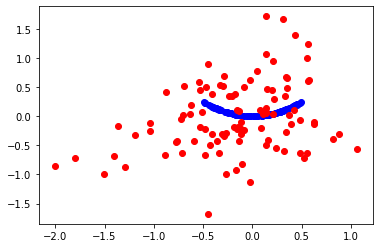

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


@1000: R_0.48 F_0.99


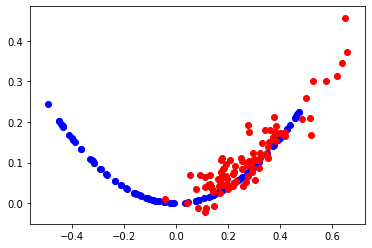

@2000: R_0.38 F_0.92


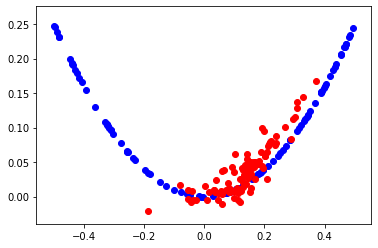

@3000: R_0.52 F_0.38


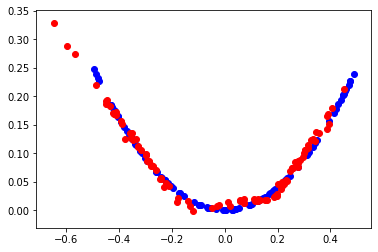

@4000: R_0.49 F_0.71


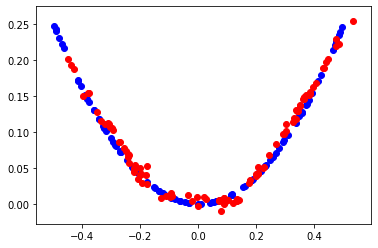

@5000: R_0.45 F_0.66


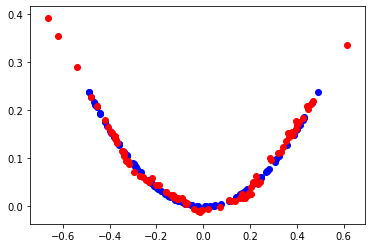

In [250]:
latent_dim = 5
discriminator = define_discriminator()
generator = define_generator(latent_dim)
gan = define_gan(generator, discriminator)
train(generator, discriminator, gan, latent_dim)

In [0]:
def build_generator():
  gen = Sequential()

  gen.add(Dense(units=16, input_dim=2))
  gen.add(LeakyReLU(0.2))
  gen.add(BatchNormalization(momentum=0.8))

  gen.add(Dense(units=32))

  gen.add(Dense(units=64))
  gen.add(LeakyReLU(0.2))

  gen.add(Dense(units=2, activation='tanh'))

  gen.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))

  return gen

In [0]:
def build_discriminator():
  dis = Sequential()

  dis.add(Dense(units=64, input_dim=2))
  dis.add(LeakyReLU(0.2))
  dis.add(Dropout(0.2))

  dis.add(Dense(units=32))
  dis.add(LeakyReLU(0.2))
  dis.add(Dropout(0.3))

  dis.add(Dense(units=16))
  dis.add(LeakyReLU(0.2))
  dis.add(Dropout(0.3))

  dis.add(Dense(units=1, activation='sigmoid'))

  dis.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))

  return dis

In [0]:
def build_gan(generator, discriminator):
  discriminator.trainable = False
  
  inp = Input(shape=(2,))
  
  X = generator(inp)

  out = discriminator(X)

  gan = Model(inputs=inp, outputs=out)

  gan.compile(loss='binary_crossentropy', optimizer='adam')

  return gan

In [0]:
def show_head(epoch, generator):
  noise = np.random.normal(0, 1, size=[5,2])

  generated_data = generator.predict(noise)

  print(f"={epoch}=> {generated_data}" )

In [0]:
def load_data():
  return np.array([[i,i*i] for i in range(1, 101)])

In [145]:
def training(epochs=1, batch_size=10):
    
    data = load_data()
    
    generator = build_generator()
    discriminator = build_discriminator()
    gan = build_gan(generator, discriminator)

    
    for e in range(1,epochs+1):
        
        print("Epoch %d" %e)
        
        for _ in range(batch_size):
            
            noise= np.random.normal(0,1, [batch_size,2])
            
            generated_data = generator.predict(noise)
            
            batch_data = data[np.random.randint(low=0, high=data.shape[0], size=batch_size)]

            X = np.concatenate([batch_data, generated_data])
            
            y_dis = np.zeros(2*batch_size)
            y_dis[:batch_size]=0.9
            
            discriminator.trainable=True
            discriminator.fit(X, y_dis)
            
            noise= np.random.normal(0,1, [batch_size,2])
            y_gen = np.ones(batch_size)
            
            discriminator.trainable=False
            
            gan.fit(noise, y_gen)
            
        if e == 1 or e % 20 == 0:
            show_head(e, generator)
training(150)

Epoch 1
Epoch 1/1
20/20 [==============================] - 5s 241ms/step - loss: 2.7684
Epoch 1/1
10/10 [==============================] - 5s 499ms/step - loss: 0.6708
Epoch 1/1
20/20 [==============================] - 0s 328us/step - loss: 1.6763
Epoch 1/1
10/10 [==============================] - 0s 713us/step - loss: 0.6762
Epoch 1/1
20/20 [==============================] - 0s 248us/step - loss: 3.0980
Epoch 1/1
10/10 [==============================] - 0s 779us/step - loss: 0.6709
Epoch 1/1
20/20 [==============================] - 0s 251us/step - loss: 1.6909
Epoch 1/1
10/10 [==============================] - 0s 692us/step - loss: 0.6944
Epoch 1/1
20/20 [==============================] - 0s 248us/step - loss: 1.8088
Epoch 1/1
10/10 [==============================] - 0s 698us/step - loss: 0.6614
Epoch 1/1
20/20 [==============================] - 0s 350us/step - loss: 1.0881
Epoch 1/1
10/10 [==============================] - 0s 733us/step - loss: 0.6719
Epoch 1/1
20/20 [===============

In [0]:
# working on fashion MNIST database

In [123]:
# example of loading the fashion_mnist dataset
from keras.datasets.fashion_mnist import load_data
# load the images into memory
(trainX, trainy), (testX, testy) = load_data()
# summarize the shape of the dataset
print('Train', trainX.shape, trainy.shape)
print('Test', testX.shape, testy.shape)

4423680/4422102 [==============================] - 1s 0us/step
Train (60000, 28, 28) (60000,)
Test (10000, 28, 28) (10000,)


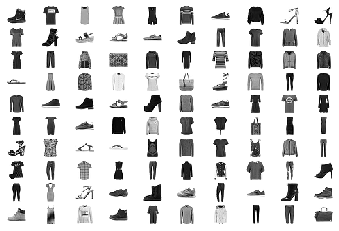

In [124]:
from matplotlib import pyplot
# plot images from the training dataset
for i in range(100):
	# define subplot
	pyplot.subplot(10, 10, 1 + i)
	# turn off axis
	pyplot.axis('off')
	# plot raw pixel data
	pyplot.imshow(trainX[i], cmap='gray_r')
pyplot.show()

In [0]:
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy.random import randn
from numpy.random import randint

from keras.models import Sequential
from keras.layers import Conv2D, Conv2DTranspose, LeakyReLU, Flatten, Reshape, Dropout, Dense
from keras.optimizers import Adam

In [0]:
# define the standalone discriminator model
def define_discriminator(in_shape=(28,28,1)):
	model = Sequential()
	# downsample
	model.add(Conv2D(128, (3,3), strides=(2,2), padding='same', input_shape=in_shape))
	model.add(LeakyReLU(alpha=0.2))
	# downsample
	model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# classifier
	model.add(Flatten())
	model.add(Dropout(0.4))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
	return model

In [0]:
# define the standalone generator model
def define_generator(latent_dim):
	model = Sequential()
	# foundation for 7x7 image
	n_nodes = 128 * 7 * 7
	model.add(Dense(n_nodes, input_dim=latent_dim))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Reshape((7, 7, 128)))
	# upsample to 14x14
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# upsample to 28x28
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# generate
	model.add(Conv2D(1, (7,7), activation='tanh', padding='same'))
	return model

In [0]:
# define the combined generator and discriminator model, for updating the generator
def define_gan(generator, discriminator):
	# make weights in the discriminator not trainable
	discriminator.trainable = False
	# connect them
	model = Sequential()
	# add generator
	model.add(generator)
	# add the discriminator
	model.add(discriminator)
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt)
	return model

In [0]:
# load fashion mnist images
def load_real_samples():
	# load dataset
	(trainX, _), (_, _) = load_data()
	# expand to 3d, e.g. add channels
	X = expand_dims(trainX, axis=-1)
	# convert from ints to floats
	X = X.astype('float32')
	# scale from [0,255] to [-1,1]
	X = (X - 127.5) / 127.5
	return X

In [0]:
# select real samples
def generate_real_samples(dataset, n_samples):
	# choose random instances
	ix = randint(0, dataset.shape[0], n_samples)
	# select images
	X = dataset[ix]
	# generate class labels
	y = ones((n_samples, 1))
	return X, y

In [0]:
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input

In [0]:
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n_samples):
	# generate points in latent space
	x_input = generate_latent_points(latent_dim, n_samples)
	# predict outputs
	X = generator.predict(x_input)
	# create class labels
	y = zeros((n_samples, 1))
	return X, y

In [0]:
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=40, n_batch=128):
	bat_per_epo = int(dataset.shape[0] / n_batch)
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_epochs):
		# enumerate batches over the training set
		for j in range(bat_per_epo):
			# get randomly selected 'real' samples
			X_real, y_real = generate_real_samples(dataset, half_batch)
			# update discriminator model weights
			d_loss1, _ = d_model.train_on_batch(X_real, y_real)
			# generate 'fake' examples
			X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
			# update discriminator model weights
			d_loss2, _ = d_model.train_on_batch(X_fake, y_fake)
			# prepare points in latent space as input for the generator
			X_gan = generate_latent_points(latent_dim, n_batch)
			# create inverted labels for the fake samples
			y_gan = ones((n_batch, 1))
			# update the generator via the discriminator's error
			g_loss = gan_model.train_on_batch(X_gan, y_gan)
			# summarize loss on this batch
			print('>%d, %d/%d, d1=%.3f, d2=%.3f g=%.3f' %
				(i+1, j+1, bat_per_epo, d_loss1, d_loss2, g_loss))
	# save the generator model
	g_model.save('generator.h5')

In [134]:
# size of the latent space
latent_dim = 100
# create the discriminator
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)
# load image data
dataset = load_real_samples()
# train model
train(generator, discriminator, gan_model, dataset, latent_dim)

>32, 181/468, d1=0.693, d2=0.684 g=0.707
>32, 182/468, d1=0.695, d2=0.693 g=0.708
>32, 183/468, d1=0.696, d2=0.698 g=0.704
>32, 184/468, d1=0.689, d2=0.691 g=0.716
>32, 185/468, d1=0.688, d2=0.699 g=0.702
>32, 186/468, d1=0.693, d2=0.708 g=0.708
>32, 187/468, d1=0.675, d2=0.695 g=0.707
>32, 188/468, d1=0.702, d2=0.693 g=0.701
>32, 189/468, d1=0.697, d2=0.692 g=0.707
>32, 190/468, d1=0.700, d2=0.700 g=0.716
>32, 191/468, d1=0.695, d2=0.693 g=0.706
>32, 192/468, d1=0.705, d2=0.689 g=0.705
>32, 193/468, d1=0.688, d2=0.689 g=0.723
>32, 194/468, d1=0.688, d2=0.676 g=0.720
>32, 195/468, d1=0.687, d2=0.687 g=0.716
>32, 196/468, d1=0.696, d2=0.688 g=0.709
>32, 197/468, d1=0.682, d2=0.698 g=0.712
>32, 198/468, d1=0.696, d2=0.690 g=0.711
>32, 199/468, d1=0.682, d2=0.698 g=0.711
>32, 200/468, d1=0.693, d2=0.691 g=0.706
>32, 201/468, d1=0.690, d2=0.678 g=0.704
>32, 202/468, d1=0.713, d2=0.692 g=0.712
>32, 203/468, d1=0.699, d2=0.677 g=0.716
>32, 204/468, d1=0.704, d2=0.675 g=0.716
>32, 205/468, d1

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:310: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


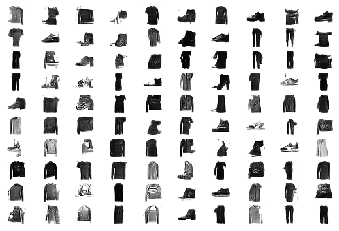

In [135]:
# example of loading the generator model and generating images
from keras.models import load_model
from numpy.random import randn
from matplotlib import pyplot

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input

# create and save a plot of generated images (reversed grayscale)
def show_plot(examples, n):
	# plot images
	for i in range(n * n):
		# define subplot
		pyplot.subplot(n, n, 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(examples[i, :, :, 0], cmap='gray_r')
	pyplot.show()

# load model
model = load_model('generator.h5')
# generate images
latent_points = generate_latent_points(100, 100)
# generate images
X = model.predict(latent_points)
# plot the result
show_plot(X, 10)